# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                                Computing ID
# Carina Martinez                     fyv5hu
# Danella Romera                      tzb5xh

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/ftx-2021-01-01--2023-12-31.csv')
print(df)

    timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp
0    2022-12-31T00:00:00.000Z;"2022-12-31T23:59:59....                                
1    2022-12-30T00:00:00.000Z;"2022-12-30T23:59:59....                                
2    2022-12-29T00:00:00.000Z;"2022-12-29T23:59:59....                                
3    2022-12-28T00:00:00.000Z;"2022-12-28T23:59:59....                                
4    2022-12-27T00:00:00.000Z;"2022-12-27T23:59:59....                                
..                                                 ...                                
736  2021-01-06T00:00:00.000Z;"2021-01-06T23:59:59....                                
737  2021-01-05T00:00:00.000Z;"2021-01-05T23:59:59....                                
738  2021-01-04T00:00:00.000Z;"2021-01-04T23:59:59....                                
739  2021-01-03T00:00:00.000Z;"2021-01-03T23:59:59....                                
740  2021-01-03T00:00:00.000Z;"2021-01-03T2

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [ ]:
num_rows, num_columns = df.shape
print('There are', num_rows, 'rows.')
print('There is', num_columns, 'column.')

There are 741 rows.
There is 1 column.


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [ ]:
#First, we're going to separate the different variables into separate columns.
df = pd.read_csv('/content/ftx-2021-01-01--2023-12-31.csv', sep=';')
print(df)

                     timeOpen                 timeClose  \
0    2022-12-31T00:00:00.000Z  2022-12-31T23:59:59.999Z   
1    2022-12-30T00:00:00.000Z  2022-12-30T23:59:59.999Z   
2    2022-12-29T00:00:00.000Z  2022-12-29T23:59:59.999Z   
3    2022-12-28T00:00:00.000Z  2022-12-28T23:59:59.999Z   
4    2022-12-27T00:00:00.000Z  2022-12-27T23:59:59.999Z   
..                        ...                       ...   
736  2021-01-06T00:00:00.000Z  2021-01-06T23:59:59.999Z   
737  2021-01-05T00:00:00.000Z  2021-01-05T23:59:59.999Z   
738  2021-01-04T00:00:00.000Z  2021-01-04T23:59:59.999Z   
739  2021-01-03T00:00:00.000Z  2021-01-03T23:59:59.999Z   
740  2021-01-03T00:00:00.000Z  2021-01-03T23:59:59.999Z   

                     timeHigh                   timeLow      open      high  \
0    2022-12-31T15:23:00.000Z  2022-12-31T00:21:00.000Z  0.838968  0.853502   
1    2022-12-30T04:22:00.000Z  2022-12-30T15:12:00.000Z  0.860193  0.864752   
2    2022-12-29T00:49:00.000Z  2022-12-29T21:03:00.000

In [ ]:
#Just checking to make sure all variables are separated now:
num_rows, num_columns = df.shape
print('There are', num_rows, 'rows.')
print('There are', num_columns, 'columns.')

There are 741 rows.
There are 11 columns.


In [ ]:
#Getting rid of duplicate rows:
print('There were', df.duplicated().sum(), 'duplicated rows.')
df = df.drop_duplicates()
print('There are now', df.duplicated().sum(), 'duplicated rows.')

There were 14 duplicated rows.
There are now 0 duplicated rows.


In [ ]:
#Getting rid of empty values:
df = df.dropna()
empty_vals = df.isna().sum()
total_empty_vals = empty_vals.sum()
print('There are', total_empty_vals, 'missing values.')

There are 0 missing values.


In [ ]:
#Filling the empty values with zero.
df.fillna(0, inplace=True)

In [ ]:
#Drop all other columns:
df = df.drop(['open', 'high', 'low', 'close', 'volume', 'timestamp'], axis=1)
df

,timeOpen,timeClose,timeHigh,timeLow,marketCap
0,2022-12-31T00:00:00.000Z,2022-12-31T23:59:59.999Z,2022-12-31T15:23:00.000Z,2022-12-31T00:21:00.000Z,2.771561e+08
1,2022-12-30T00:00:00.000Z,2022-12-30T23:59:59.999Z,2022-12-30T04:22:00.000Z,2022-12-30T15:12:00.000Z,2.759588e+08
2,2022-12-29T00:00:00.000Z,2022-12-29T23:59:59.999Z,2022-12-29T00:49:00.000Z,2022-12-29T21:03:00.000Z,2.829258e+08
3,2022-12-28T00:00:00.000Z,2022-12-28T23:59:59.999Z,2022-12-28T00:20:00.000Z,2022-12-28T10:44:00.000Z,2.914310e+08
4,2022-12-27T00:00:00.000Z,2022-12-27T23:59:59.999Z,2022-12-27T14:19:00.000Z,2022-12-27T19:12:00.000Z,3.037898e+08
...,...,...,...,...,...
735,2021-01-07T00:00:00.000Z,2021-01-07T23:59:59.999Z,2021-01-07T17:59:03.000Z,2021-01-07T08:25:03.000Z,9.021580e+08
736,2021-01-06T00:00:00.000Z,2021-01-06T23:59:59.999Z,2021-01-06T23:59:03.000Z,2021-01-06T01:41:03.000Z,8.859932e+08
737,2021-01-05T00:00:00.000Z,2021-01-05T23:59:59.999Z,2021-01-05T22:44:03.000Z,2021-01-05T06:19:03.000Z,8.174869e+08
738,2021-01-04T00:00:00.000Z,2021-01-04T23:59:59.999Z,2021-01-04T06:40:03.000Z,2021-01-04T10:18:03.000Z,7.089305e+08


In [ ]:
#Clean up timestamps
df['timeOpen'] = pd.to_datetime(df['timeOpen'], infer_datetime_format=True, errors = 'coerce')
df['timeClose'] = pd.to_datetime(df['timeClose'], infer_datetime_format=True, errors = 'coerce')
df['timeHigh'] = pd.to_datetime(df['timeHigh'], infer_datetime_format=True, errors = 'coerce')
df['timeLow'] = pd.to_datetime(df['timeLow'], infer_datetime_format=True, errors = 'coerce')
#Put them in chronological order
df['timeOpen'] = pd.to_datetime(df['timeOpen'])
df = df.sort_values(by='timeOpen')
df['timeClose'] = pd.to_datetime(df['timeClose'])
df = df.sort_values(by='timeClose')
df['timeHigh'] = pd.to_datetime(df['timeHigh'])
df = df.sort_values(by='timeHigh')
df['timeLow'] = pd.to_datetime(df['timeLow'])
df = df.sort_values(by='timeLow')
df = df.reset_index(drop=True)
df

,timeOpen,timeClose,timeHigh,timeLow,marketCap
0,2021-01-03 00:00:00+00:00,2021-01-03 23:59:59.999000+00:00,2021-01-03 16:25:03+00:00,2021-01-03 00:25:03+00:00,6.532553e+08
1,2021-01-04 00:00:00+00:00,2021-01-04 23:59:59.999000+00:00,2021-01-04 06:40:03+00:00,2021-01-04 10:18:03+00:00,7.089305e+08
2,2021-01-05 00:00:00+00:00,2021-01-05 23:59:59.999000+00:00,2021-01-05 22:44:03+00:00,2021-01-05 06:19:03+00:00,8.174869e+08
3,2021-01-06 00:00:00+00:00,2021-01-06 23:59:59.999000+00:00,2021-01-06 23:59:03+00:00,2021-01-06 01:41:03+00:00,8.859932e+08
4,2021-01-07 00:00:00+00:00,2021-01-07 23:59:59.999000+00:00,2021-01-07 17:59:03+00:00,2021-01-07 08:25:03+00:00,9.021580e+08
...,...,...,...,...,...
722,2022-12-27 00:00:00+00:00,2022-12-27 23:59:59.999000+00:00,2022-12-27 14:19:00+00:00,2022-12-27 19:12:00+00:00,3.037898e+08
723,2022-12-28 00:00:00+00:00,2022-12-28 23:59:59.999000+00:00,2022-12-28 00:20:00+00:00,2022-12-28 10:44:00+00:00,2.914310e+08
724,2022-12-29 00:00:00+00:00,2022-12-29 23:59:59.999000+00:00,2022-12-29 00:49:00+00:00,2022-12-29 21:03:00+00:00,2.829258e+08
725,2022-12-30 00:00:00+00:00,2022-12-30 23:59:59.999000+00:00,2022-12-30 04:22:00+00:00,2022-12-30 15:12:00+00:00,2.759588e+08


Now display the first 10 rows of the cleaned dataset.

In [ ]:
df.head(10)

,timeOpen,timeClose,timeHigh,timeLow,marketCap
0,2021-01-03 00:00:00+00:00,2021-01-03 23:59:59.999000+00:00,2021-01-03 16:25:03+00:00,2021-01-03 00:25:03+00:00,6.532553e+08
1,2021-01-04 00:00:00+00:00,2021-01-04 23:59:59.999000+00:00,2021-01-04 06:40:03+00:00,2021-01-04 10:18:03+00:00,7.089305e+08
2,2021-01-05 00:00:00+00:00,2021-01-05 23:59:59.999000+00:00,2021-01-05 22:44:03+00:00,2021-01-05 06:19:03+00:00,8.174869e+08
3,2021-01-06 00:00:00+00:00,2021-01-06 23:59:59.999000+00:00,2021-01-06 23:59:03+00:00,2021-01-06 01:41:03+00:00,8.859932e+08
4,2021-01-07 00:00:00+00:00,2021-01-07 23:59:59.999000+00:00,2021-01-07 17:59:03+00:00,2021-01-07 08:25:03+00:00,9.021580e+08
5,2021-01-08 00:00:00+00:00,2021-01-08 23:59:59.999000+00:00,2021-01-08 15:07:03+00:00,2021-01-08 02:46:03+00:00,8.850677e+08
6,2021-01-09 00:00:00+00:00,2021-01-09 23:59:59.999000+00:00,2021-01-09 22:15:03+00:00,2021-01-09 07:05:03+00:00,9.029486e+08
7,2021-01-10 00:00:00+00:00,2021-01-10 23:59:59.999000+00:00,2021-01-10 09:53:03+00:00,2021-01-10 20:31:03+00:00,8.782578e+08
8,2021-01-11 00:00:00+00:00,2021-01-11 23:59:59.999000+00:00,2021-01-11 00:00:03+00:00,2021-01-11 16:47:03+00:00,8.124213e+08
9,2021-01-12 00:00:00+00:00,2021-01-12 23:59:59.999000+00:00,2021-01-12 07:51:03+00:00,2021-01-12 14:38:03+00:00,7.907344e+08


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [ ]:
#Adding new column
df['close_change'] = df['marketCap'].diff()
df.fillna(0, inplace=True)
df

,timeOpen,timeClose,timeHigh,timeLow,marketCap,close_change
0,2021-01-03 00:00:00+00:00,2021-01-03 23:59:59.999000+00:00,2021-01-03 16:25:03+00:00,2021-01-03 00:25:03+00:00,6.532553e+08,0.000000e+00
1,2021-01-04 00:00:00+00:00,2021-01-04 23:59:59.999000+00:00,2021-01-04 06:40:03+00:00,2021-01-04 10:18:03+00:00,7.089305e+08,5.567517e+07
2,2021-01-05 00:00:00+00:00,2021-01-05 23:59:59.999000+00:00,2021-01-05 22:44:03+00:00,2021-01-05 06:19:03+00:00,8.174869e+08,1.085564e+08
3,2021-01-06 00:00:00+00:00,2021-01-06 23:59:59.999000+00:00,2021-01-06 23:59:03+00:00,2021-01-06 01:41:03+00:00,8.859932e+08,6.850623e+07
4,2021-01-07 00:00:00+00:00,2021-01-07 23:59:59.999000+00:00,2021-01-07 17:59:03+00:00,2021-01-07 08:25:03+00:00,9.021580e+08,1.616480e+07
...,...,...,...,...,...,...
722,2022-12-27 00:00:00+00:00,2022-12-27 23:59:59.999000+00:00,2022-12-27 14:19:00+00:00,2022-12-27 19:12:00+00:00,3.037898e+08,-2.311532e+06
723,2022-12-28 00:00:00+00:00,2022-12-28 23:59:59.999000+00:00,2022-12-28 00:20:00+00:00,2022-12-28 10:44:00+00:00,2.914310e+08,-1.235882e+07
724,2022-12-29 00:00:00+00:00,2022-12-29 23:59:59.999000+00:00,2022-12-29 00:49:00+00:00,2022-12-29 21:03:00+00:00,2.829258e+08,-8.505134e+06
725,2022-12-30 00:00:00+00:00,2022-12-30 23:59:59.999000+00:00,2022-12-30 04:22:00+00:00,2022-12-30 15:12:00+00:00,2.759588e+08,-6.966980e+06


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [ ]:
df['close_change'] = df['marketCap'].diff()

top_positive_growth = df[df['close_change'] > 0].sort_values(by='close_change', ascending=False).head(10)

print(top_positive_growth[['timeClose', 'close_change']])

                           timeClose  close_change
249 2021-09-09 23:59:59.999000+00:00  2.465882e+09
241 2021-09-01 23:59:59.999000+00:00  1.573439e+09
246 2021-09-06 23:59:59.999000+00:00  9.246304e+08
319 2021-11-18 23:59:59.999000+00:00  8.536257e+08
47  2021-02-19 23:59:59.999000+00:00  7.864668e+08
420 2022-02-28 23:59:59.999000+00:00  6.066562e+08
141 2021-05-24 23:59:59.999000+00:00  5.975863e+08
262 2021-09-22 23:59:59.999000+00:00  5.283757e+08
65  2021-03-09 23:59:59.999000+00:00  5.217103e+08
290 2021-10-20 23:59:59.999000+00:00  5.112588e+08


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [ ]:
#Using .pct_change() function to get percentages, whilst also replacing any
# values that may be approaching infinity.
df['rate_of_change'] = df['close_change'].pct_change()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna()
df.fillna(0, inplace=True)
df

,timeOpen,timeClose,timeHigh,timeLow,marketCap,close_change,rate_of_change
0,2021-01-03 00:00:00+00:00,2021-01-03 23:59:59.999000+00:00,2021-01-03 16:25:03+00:00,2021-01-03 00:25:03+00:00,6.532553e+08,0.000000e+00,0.000000
1,2021-01-04 00:00:00+00:00,2021-01-04 23:59:59.999000+00:00,2021-01-04 06:40:03+00:00,2021-01-04 10:18:03+00:00,7.089305e+08,5.567517e+07,0.000000
2,2021-01-05 00:00:00+00:00,2021-01-05 23:59:59.999000+00:00,2021-01-05 22:44:03+00:00,2021-01-05 06:19:03+00:00,8.174869e+08,1.085564e+08,0.949817
3,2021-01-06 00:00:00+00:00,2021-01-06 23:59:59.999000+00:00,2021-01-06 23:59:03+00:00,2021-01-06 01:41:03+00:00,8.859932e+08,6.850623e+07,-0.368934
4,2021-01-07 00:00:00+00:00,2021-01-07 23:59:59.999000+00:00,2021-01-07 17:59:03+00:00,2021-01-07 08:25:03+00:00,9.021580e+08,1.616480e+07,-0.764039
...,...,...,...,...,...,...,...
722,2022-12-27 00:00:00+00:00,2022-12-27 23:59:59.999000+00:00,2022-12-27 14:19:00+00:00,2022-12-27 19:12:00+00:00,3.037898e+08,-2.311532e+06,-1.195015
723,2022-12-28 00:00:00+00:00,2022-12-28 23:59:59.999000+00:00,2022-12-28 00:20:00+00:00,2022-12-28 10:44:00+00:00,2.914310e+08,-1.235882e+07,4.346593
724,2022-12-29 00:00:00+00:00,2022-12-29 23:59:59.999000+00:00,2022-12-29 00:49:00+00:00,2022-12-29 21:03:00+00:00,2.829258e+08,-8.505134e+06,-0.311817
725,2022-12-30 00:00:00+00:00,2022-12-30 23:59:59.999000+00:00,2022-12-30 04:22:00+00:00,2022-12-30 15:12:00+00:00,2.759588e+08,-6.966980e+06,-0.180850


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [ ]:
#Sorting values utilizing .sort_values and "ascending=" booleans accordingly to
# get the five highest and lowest values.
top_positive_rate_change = df.sort_values(by='rate_of_change', ascending=False).head(5)
top_negative_rate_change = df.sort_values(by='rate_of_change', ascending=True).head(5)

print("Top 5 Days of Greatest Positive Rate Change:")
print(top_positive_rate_change[['marketCap', 'rate_of_change']])

print("\nTop 5 Days of Greatest Negative Rate Change:")
print(top_negative_rate_change[['marketCap', 'rate_of_change']])

Top 5 Days of Greatest Positive Rate Change:
        marketCap  rate_of_change
359  5.568913e+09      617.855744
673  7.341564e+08      129.835551
494  4.208857e+09      117.908852
423  6.179310e+09       92.537644
220  4.768790e+09       65.569152

Top 5 Days of Greatest Negative Rate Change:
        marketCap  rate_of_change
288  6.678147e+09     -262.744728
540  3.469603e+09     -166.760434
621  3.301590e+09     -111.945187
551  3.672820e+09      -50.514692
642  3.233058e+09      -40.395387


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

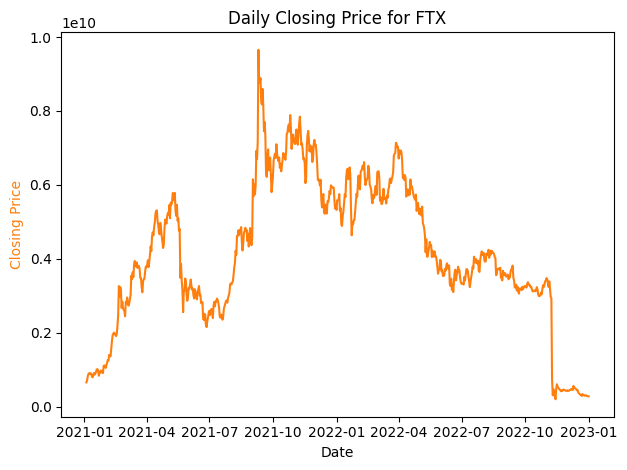

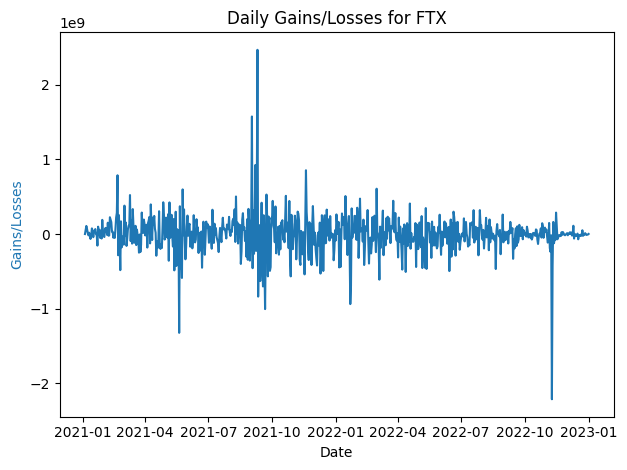

In [ ]:
#Creating two line graphs to show how "marketCap" (the daily closing price)
#and "close_change" (daily gains/losses) have developed over time ("timeClose").
import matplotlib.pyplot as plt
plt.plot(figsize=(10, 5))
color = 'tab:orange'
plt.title('Daily Closing Price for FTX')
plt.xlabel('Date')
plt.ylabel('Closing Price', color=color)
plt.plot(df['timeClose'], df['marketCap'], color=color, label='Closing Price')
plt.tight_layout()
plt.show()

plt.plot(figsize=(10, 5))
color = 'tab:blue'
plt.title('Daily Gains/Losses for FTX')
plt.xlabel('Date')
plt.ylabel('Gains/Losses', color=color)
plt.plot(df['timeClose'], df['close_change'], color=color, label='Closing Price')
plt.tight_layout()
plt.show()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

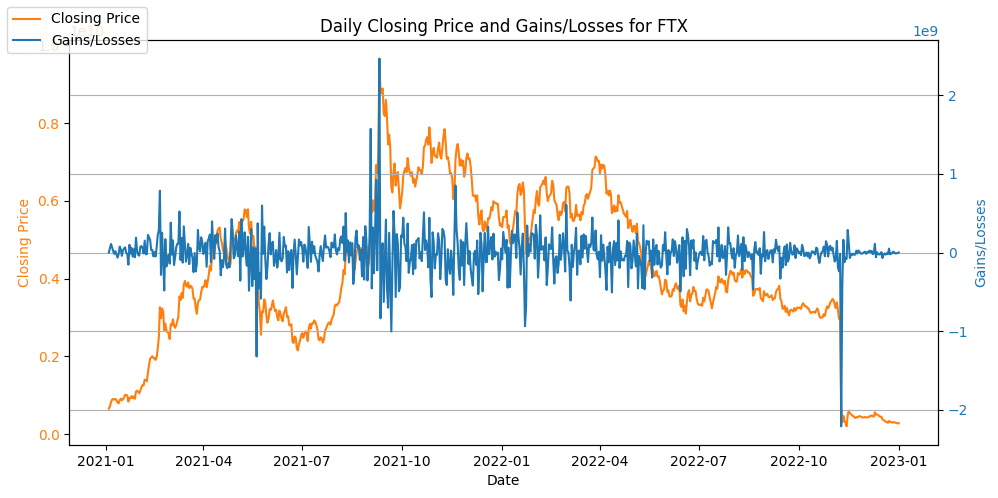

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:orange'
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(df['timeClose'], df['marketCap'], color=color, label='Closing Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Gains/Losses', color=color)
ax2.plot(df['timeClose'], df['close_change'], color=color, label='Gains/Losses')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Daily Closing Price and Gains/Losses for FTX')
fig.tight_layout()
fig.legend(loc="upper left")

plt.xticks(rotation=45)
plt.grid(True)
plt.show()